In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('one_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']


In [4]:
x = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values.reshape(-1,8)
y = df[['Y1', 'Y2']].values.reshape(-1,2)

xs = MinMaxScaler()
ys =  MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs, "one_x_scaler.pkl")
jb.dump(ys, "one_y_scaler.pkl")

['one_y_scaler.pkl']

In [12]:
def prob(x1,x2,x3,x4,x5,x6,x7,x8):
    inp = np.array([[x1,x2,x3,x4,x5,x6,x7,x8]], dtype=float)
    xs = jb.load('one_x_scaler.pkl')
    ys = jb.load('one_y_scaler.pkl')
    inp = xs.transform(inp)
    model_path = 'one.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(8,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=200)
        lv = h.history['loss']
        model.save('one.keras')
        pred = model.predict(x)
        
        plt.figure()
        plt.plot(lv)
        plt.title('Loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.subplot(1,2,1)
        plt.scatter(y[:, 0], pred[:,0], label = 'Actual vs predicted', color='pink')
        plt.plot([y[:,0].min(), y[:,0].max()], [y[:,0].min(), y[:,0].max()], 'k--')
        plt.title('y1')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(1,2,2)
        plt.scatter(y[:, 1], pred[:,1], label = 'Actual vs predicted', color='pink')
        plt.plot([y[:, 1].min(), y[:, 1].max()], [y[:,1].min(), y[:,1].max()], 'k--')
        plt.title('y2')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    return ys.inverse_transform(model.predict(inp))[0]

Epoch 1/200


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1680
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0395
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064
Epoch 16/200
2

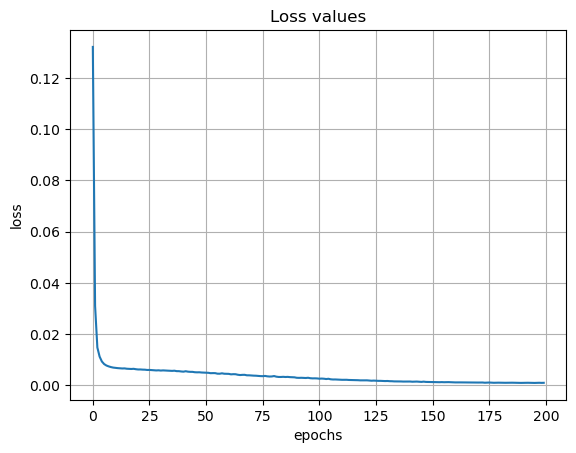

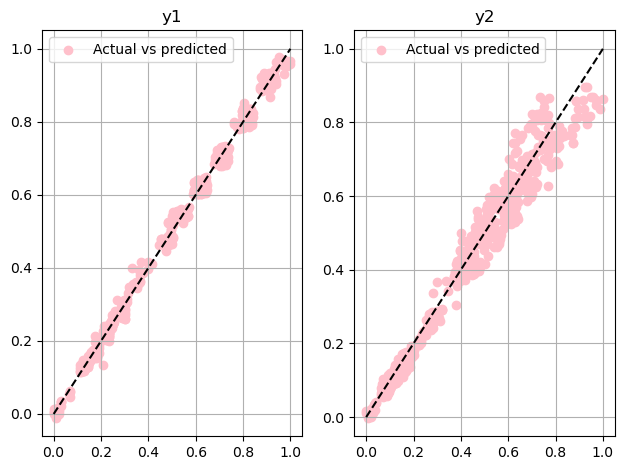

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[10.507719 17.106382]


In [13]:
num = prob(0.95,500,250,100,6.5,2,0,0)
print(num)